# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

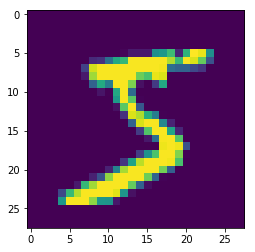

Label:  5


In [3]:
ii = np.random.randint(100)

plt.imshow(X_train[ii])    # show first number in the dataset
plt.show()
print('Label: ', y_train[ii])

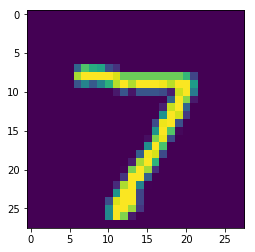

Label:  7


In [4]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
X_train.shape

(60000, 784)

In [14]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [ ]:
y_train

# Make a dataset!

In [8]:
from scipy.ndimage.filters import gaussian_filter

In [9]:
import numpy as np
from skimage.draw import (line, polygon,polygon_perimeter,
                          circle, circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

def random_inside(img,num=1,margin=0):
    '''
    This function will return a random positon in an image.
    '''
    lx,ly = img.shape[:2]
    x = np.random.randint(margin,lx-margin,num)
    y = np.random.randint(margin,ly-margin,num)
    return np.c_[x,y]

def draw_circle(img,center=None,rs=None,rmin=10,rmax=20,fill=False,value=1):
    if fill:
        drawer = circle
    else:
        drawer = circle_perimeter
    if center is None or rs is None:
        rs = np.random.randint(rmin,rmax)
        center = random_inside(img,num=1,margin=rmax)[0]

    rr, cc = drawer(center[0], center[1], rs, shape=img.shape)
    img[rr, cc] += value
    return img

def draw_polygon(img,polys,fill=False,value=1):
    if fill:
        drawer = polygon
    else:
        drawer = polygon_perimeter
    for poly in polys:
        rr, cc = drawer(poly[:, 0], poly[:, 1],shape=img.shape)
        img[rr, cc] += value
    return img

def draw_square(img,center=None,ll=None,lmax=10,fill=False,value=1):  
    if ll is None:
        lx = np.random.randint(5,lmax)
        ly = np.random.randint(5,lmax)
    else:
        lx = ll[0]
        ly = ll[1]
    if center is None:
        center = np.array([np.random.randint(lx,img.shape[0]-lx),
                           np.random.randint(ly,img.shape[1]-ly)])
        
    exes = np.array([[-lx,-ly],[-lx,ly],[lx,ly],[lx,-ly]])
    poly = np.array([[center+ex for ex in exes]])        
    img = draw_polygon(img,polys=poly,fill=fill,value=value)
    return img

def add_noise(img,mu=0,sigma=1,ls=0):
    noise = np.random.normal(mu,sigma,img.shape)
    if ls!=0:
        noise = gaussian_filter(noise,ls)
        
    return img+noise

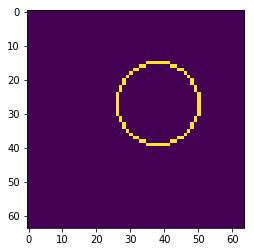

In [10]:
img = np.zeros((64,64))
img = draw_circle(img,center=None,rs=None,rmin=10,rmax=20,fill=False,value=1)
plt.imshow(img)

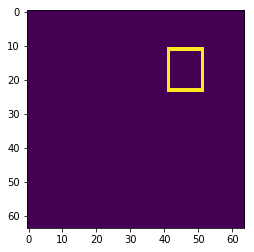

In [11]:
img = np.zeros((64,64))
img = draw_square(img,center=None,ll=None,fill=False,value=1)
plt.imshow(img)

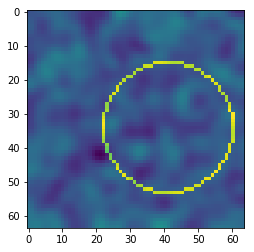

In [12]:
img = np.zeros((64,64))
img = draw_circle(img,center=None,rs=None,rmin=10,rmax=20,fill=False,value=1)
img = add_noise(img,mu=0,sigma=0.7,ls=2)
plt.imshow(img)

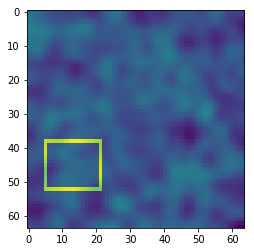

In [13]:
img = np.zeros((64,64))
img = draw_square(img,center=None,ll=None,fill=False,value=1)
img = add_noise(img,mu=0,sigma=0.7,ls=2)
plt.imshow(img)

In [44]:
X_total = []
y_total = []
for i in range(1000):
    img = np.zeros((32,32))
    img = draw_circle(img,center=None,rs=None,rmin=5,rmax=15,fill=False,value=1)
#     img = add_noise(img,mu=0,sigma=0.7,ls=2)
    X_total.append(img)
    y_total.append(0)
    
    img = np.zeros((32,32))
    img = draw_square(img,center=None,ll=None,fill=False,value=1)
#     img = add_noise(img,mu=0,sigma=0.7,ls=2)
    X_total.append(img)
    y_total.append(1)

X_total = np.array(X_total).reshape(-1,32*32)
y_total = np.array(y_total)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.67, random_state = 7)

In [46]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(660, 1024) (1340, 1024) (660, 2) (1340, 2)


In [69]:
n_input = 1024
n_output = 2

## Basic MLP model
- Naive MLP model without any alterations

In [70]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [74]:
model = Sequential()

In [75]:
model.add(Dense(50, input_shape = (n_input, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(n_output))
model.add(Activation('softmax'))

In [76]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [77]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

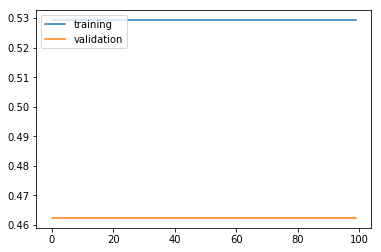

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [80]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 146us/step


In [81]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4955223798751831


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [82]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(n_output, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [83]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

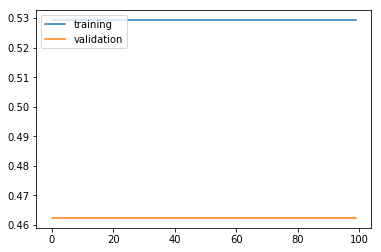

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [85]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 52us/step


In [86]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4955223798751831


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>

<center> **Sigmoid Activation Function** </center>

<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>

<center> **Relu Activation Function** </center>

In [87]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(n_output))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [88]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

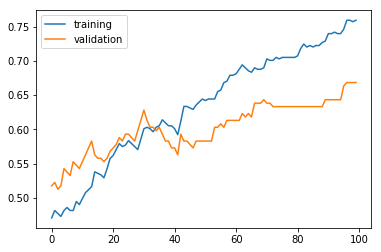

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [93]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 49us/step


In [94]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6716417670249939


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [95]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(n_output))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [96]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

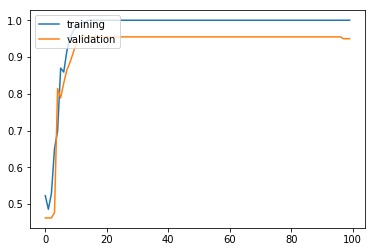

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [99]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 34us/step


In [100]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9529850482940674


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [104]:
from keras.layers import BatchNormalization

In [105]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(n_output))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [106]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

In [107]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_51 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
activation_52 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 50)              

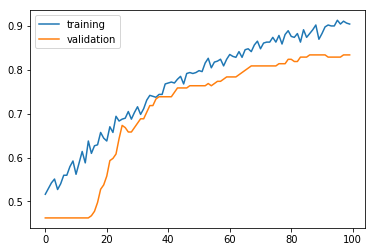

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [110]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 122us/step


In [111]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8574627041816711


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [112]:
from keras.layers import Dropout

In [113]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(n_output))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [114]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

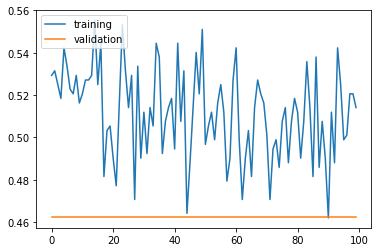

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [116]:
results = model.evaluate(X_test, y_test)

1340/1340 [==============================] - 0s 36us/step


In [117]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4955223798751831


In [118]:
?Dropout

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs1CBSEtpp5yj6SJ5K_nHd1FNfyEYa9KLjWfoMY_v7ARTq3tdpVw" style="width: 300px"/>

In [121]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [122]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [123]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (n_input, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(n_output))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [124]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)

In [125]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [126]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f031c10fa58>), ('model2', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f031c10fb70>), ('model3', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f031c10fc50>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [127]:
y_pred = ensemble_clf.predict(X_test)

In [128]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.4955223880597015


Slight boost in the test accuracy from the outset **(0.2144 => 0.3045)**

# A bit more complex MLP
- Putting it altogether

In [66]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers

## Load Dataset

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [68]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [69]:
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Training & Validating Model
- Measures to improve training is applied simultaneously
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [71]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [72]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [73]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), 
                                              ('model3', model3), ('model4', model4), ('model5', model5)], 
                                voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.7522 - acc: 0.7732
Epoch 2/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.4410 - acc: 0.8742
Epoch 3/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.3661 - acc: 0.8961
Epoch 4/100
60000/60000 [==============================] - 8s 133us/step - loss: 0.3268 - acc: 0.9071
Epoch 5/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.3044 - acc: 0.9132
Epoch 6/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.2872 - acc: 0.9185
Epoch 7/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.2621 - acc: 0.9269
Epoch 8/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.2618 - acc: 0.9258
Epoch 9/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.2495 - acc: 0.9299
Epoch 10/100
60000/60000 [==============================] - 10s 168us/step - loss:

60000/60000 [==============================] - 5s 84us/step - loss: 0.1531 - acc: 0.9548
Epoch 61/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.1536 - acc: 0.9546
Epoch 62/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.1573 - acc: 0.9536
Epoch 63/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1538 - acc: 0.9563
Epoch 64/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1557 - acc: 0.9548
Epoch 65/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1547 - acc: 0.9540
Epoch 66/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1557 - acc: 0.9548
Epoch 67/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1554 - acc: 0.9544
Epoch 68/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1538 - acc: 0.9554
Epoch 69/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1522 - acc: 

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Acc: ', accuracy_score(y_pred, y_test))

# Convolution

In [1]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import GlobalMaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras.preprocessing import image

Using TensorFlow backend.


## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

In [4]:
img = image.load_img('./data/dog.jpg', target_size = (100, 100))

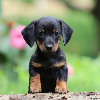

In [6]:
img

In [7]:
img = image.img_to_array(img)

In [8]:
print(img.shape)

(100, 100, 3)


## Convolution: FIlter/kernels
### No padding, no strides
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

In [9]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid')

## Padding
### ZeroPadding
Customized paddings can be given with ZeroPadding**n**D layer

In [ ]:
# user-customized padding
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

### Padding: same
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same')

## Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (2,2), padding = 'valid')

## Padding+Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif)

### Dilated convolution

In [16]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1),
       padding = 'same', dilation_rate=(1, 1))

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif)

## Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

### MaxPooling layer

<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [25]:
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
MaxPooling2D(pool_size = (2,2), padding = 'valid')

### So a 2D Convolutional Layer Includes:
- Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
- Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
- Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
- Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

[ref](https://keras.io/layers/convolutional/)

### Convolution+Pooling

In [30]:
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))

In [33]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same')
GlobalMaxPooling2D()

## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [42]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [43]:
print(model.output_shape)

(None, 10, 10, 10)


In [44]:
model.add(Flatten())

In [45]:
print(model.output_shape)

(None, 1000)


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [46]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [47]:
print(model.output_shape)

(None, 50)


## A bit deeper:
- Weight Initialization
- Batch Normalization
- l1 and l2 regularizations
- Dropout (Regularization)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense,BatchNormalization, Dropout

Using TensorFlow backend.


### Initialization

In [14]:
def init1(shape, dtype=None):
    print(shape)
#     return np.array([2]).reshape(shape).astype(dtype)
#     return np.random.normal(0,1,shape).reshape(shape).astype(dtype)
    return np.zeros(shape).reshape(shape).astype(dtype)

def init2(shape, dtype=None):
    print(shape)
#     return np.array([1]).reshape(shape).astype(dtype)
#     return np.random.normal(0,1,shape).reshape(shape).astype(dtype)
    return np.ones(shape).reshape(shape).astype(dtype)

In [15]:
x1 = Input(shape=(1,))
x2 = Dense(10, kernel_initializer=init1, bias_initializer=init2)(x1)

model = Model(inputs=x1,outputs=x2)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(1, 10)
(10,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.predict([1])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

### Batch Normalization

![](https://www.researchgate.net/profile/Tali_Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png)

In [17]:
def init1(shape, dtype=None):
    print(shape)
    return np.array([2,2,2]).reshape(shape).astype(dtype)

x1 = Input(shape=(3,))
x2 = Dense(1, kernel_initializer=init1)(x1)
x3 = BatchNormalization()(x2)

model = Model(inputs=x1,outputs=x3)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(3, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1)                 4         
Total params: 8
Trainable params: 6
Non-trainable params: 2
_________________________________________________________________


### Dropout

![](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [36]:
def init1(shape, dtype=None):
    print(shape)
#     return np.array(10*[2]).reshape(shape).astype(dtype)
    return np.arange(shape[0]*shape[1]).reshape(shape).astype(dtype)

x1 = Input(shape=(10,))
x2 = Dense(10, kernel_initializer=init1)(x1)
x3 = Dropout(0.5)(x2, training=True)
x4 = Dense(1, kernel_initializer=init1)(x3)
x5 = Dropout(0.5)(x4, training=True)

model = Model(inputs=x1,outputs=x5)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(10, 10)
(10, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
_________________________________________________________________
dropout_6 (Dropout)          (None, 1)                 0         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.predict(np.array(10*[1]).reshape(1,10))

array([[39280.]], dtype=float32)

In [36]:
# def init1(shape, dtype=None):
#     print(shape)
#     nn = shape[0]*shape[1]
#     ws = np.array(nn*[1./nn]).reshape(shape).astype(dtype)
# #     print(ws)
#     return ws

# x1 = Input(shape=(1000,))
# x2 = Dense(1, kernel_initializer=init1)(x1)
# x3 = BatchNormalization()(x2)

# model = Model(inputs=x1,outputs=x3)
# model.compile(optimizer = 'sgd', loss = 'mse')
# model.summary()

In [37]:
# x = np.random.normal(100,1,1000)
# y = model.predict(x.reshape(1,1000))
# y.mean()

In [38]:
# hist, bin_edges = np.histogram(y.reshape(-1),100)
# bin_c = 0.5*(bin_edges[1:]+bin_edges[:1])

In [39]:
# plt.plot(bin_c,hist)
# # plt.xlim(-5,5)

### Regularizers

![](https://miro.medium.com/max/2546/1*zMLv7EHYtjfr94JOBzjqTA.png)

In [ ]:
from keras.regularizers import l1,l2,l1_l2

In [ ]:
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=l2(0.01),
                bias_regularizer=l1(0.01)))

In [ ]:
l1(0.)
l2(0.)
l1_l2(l1=0.01, l2=0.01)

In [ ]:
from keras import backend as K

def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

model.add(Dense(64, input_dim=64,
                kernel_regularizer=l1_reg))


# Advanced Convolutional Neural Networks (CNN)
- Objective: try different structures of CNNs

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

# Convolutional Neural Networks (CNN)

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

### What will happen to an image:

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 1000px"/>

### Convolution is able to understand the objective in a hierarchy of concepts!

<img src="https://images.anandtech.com/doci/12673/feature_hierarchy_575px.png" style="width: 1000px"/>

### The whole story:

<img src="https://devblogs.nvidia.com/wp-content/uploads/2015/11/fig1.png" style="width: 1000px"/>